In [4]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Read data

In [9]:
df = pd.read_csv("../data/respuestas_raw.csv")
df.shape

(144, 15)

In [12]:
df.head().transpose()

,0,1,2,3,4
Timestamp,3/12/2021 19:15:01,3/17/2021 21:12:19,3/18/2021 21:28:35,3/26/2021 22:14:29,4/19/2021 13:40:42
Edad,10,9,10,9,9
Género,Femenino,Femenino,Masculino,Femenino,Femenino
¿En qué lugar usás comúnmente la computadora?,En mi casa,En mi casa,En mi casa,En mi casa,En mi casa
¿Qué hacés cuando usás la computadora (podés elegir más de una opción)?,"Miro videos en YouTube, Hago la tarea",Juego juegos,Miro videos en YouTube,"Juego juegos, Miro videos en YouTube, Hago vid...","Juego juegos, Miro videos en YouTube"
¿Dónde aprendiste a usar la computadora? (podés elegir más de una opción),"Me enseñaron en mi casa (mis padres, hermanos ...",Aprendí solo,Me enseñaron en la escuela,"Me enseñaron en mi casa (mis padres, hermanos ...","Me enseñaron en mi casa (mis padres, hermanos ..."
¿Qué celular usás?,El mío,El mío,El mío,Me prestan uno,El mío
Si usás celular: ¿qué haces cuando usás el celular? (podés elegir más de una opción),"Chateo (por ejemplo en WhatsApp o Telegram), M...","Miro redes sociales (por ejemplo Facebook, Tik...",Juego juegos,"Chateo (por ejemplo en WhatsApp o Telegram), H...",Chateo (por ejemplo en WhatsApp o Telegram)
¿Dónde se almacenan los videos que están en YouTube?,En una computadora,En una computadora,En muchas computadoras (tantas que podrían lle...,No sé,En mi celular
¿Quién tiene acceso a las fotos que tengo guardadas en mi celular?,Yo y otras personas.,Solo yo.,Solo yo.,Yo y otras personas.,Solo yo.


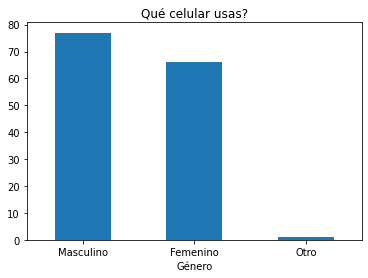

In [33]:
df["Género"].value_counts().plot.bar(rot=0)
# plt.xticks([0, 1, 2], ["m", "f", "o"])
plt.xlabel("Género")
plt.title("Qué celular usas?");

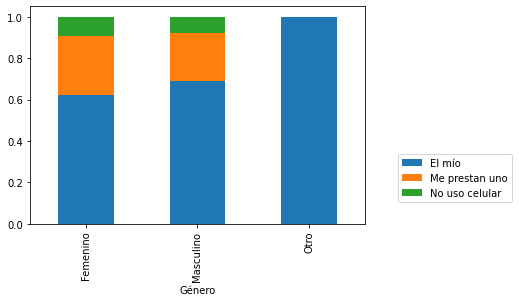

In [44]:
# idea: agrupar por una caracteristica y ver si hay un patron en las respuestas
counts = df.groupby("Género")["¿Qué celular usás?"].value_counts().unstack()
counts.div(counts.sum(axis=1), axis=0).plot.bar(stacked=True)
plt.legend(loc=(1.1, 0.1));

In [60]:
(df[question_q1] != answer_q1).head(30)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12    False
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29    False
Name: ¿Dónde se almacenan los videos que están en YouTube?, dtype: bool

In [61]:
# idea 2: calcular proporcion de missconcepions en cada pregunta
question_q1 = "¿Dónde se almacenan los videos que están en YouTube?"
answer_q1 = "En muchísimas computadoras (tantas que podrían llenar una cancha de fútbol)"
na_q1 = "No sé"
df["missconception_q1"] = (df[question_q1] != answer_q1) & (df[question_q1] != na_q1)
df["missconception_q1"].value_counts()

True     93
False    51
Name: missconception_q1, dtype: int64

In [46]:
question_2 = "¿Quién tiene acceso a las fotos que tengo guardadas en mi celular?"
answer_q2 = "Yo y otras personas."
df["missconception_q2"] = df[question_2] != answer_q2
df["missconception_q2"].value_counts()

True     103
False     41
Name: missconception_q2, dtype: int64

In [47]:
question_3 = "Cuando le mando a una amiga una foto por WhatsApp..."
answer_q3 = "La foto ahora existe en WhatsApp y mi amiga la puede ver cuando mira nuestro chat."
df["missconception_q3"] = df[question_3] != answer_q3
df["missconception_q3"].value_counts()

True     142
False      2
Name: missconception_q3, dtype: int64

In [51]:
df[["missconception_q1", "missconception_q2", "missconception_q3"]].head()

,missconception_q1,missconception_q2,missconception_q3
0,True,False,False
1,True,True,False
2,True,True,True
3,True,False,True
4,True,True,True


In [ ]:
# chi square

In [62]:
# exploratory data analysis
# cleaning, preprocessing => renombrar columnas, normalizar las respuestas (e.g. "no se." => "no sé")
# descriptive analysis (how many missconceptions, what are the questions that students failed the most, etc.)
# 0 y 10 missconception => barplot x: numero de missconceptions, y: cantidad de estudiantes

In [64]:
df['num_missconception'] = df['missconception_q1'].astype('int') +\
                           df['missconception_q2'].astype('int') +\
                           df['missconception_q3'].astype('int')
df['num_missconception'].head()

0    1
1    2
2    3
3    1
4    3
Name: num_missconception, dtype: int64

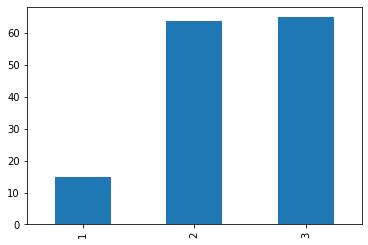

In [66]:
df['num_missconception'].value_counts().sort_index().plot.bar();